In [209]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS

from tqdm import trange
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


In [210]:

df = pd.read_csv("C:/Users/user/Desktop/2603.csv")

In [211]:
df["spread"] = df["ask_1"] - df["bid_1"]
df["total_qty"] = df["ask_qty1"] + df["bid_qty1"]
df["flow_imbalance"] = df["bid_qty1"] - df["ask_qty1"]
df["weighted_qty"] = df["total_qty"]*(np.log(df["spread"]+1))
df["mid_1"] = df["bid_1"]+ (df["ask_1"] - df["bid_1"])/2
df["mid_pct"] = df["mid_1"].pct_change(1)
df["theo"] = ((((df["bid_qty1"]/df["total_qty"])*df["bid_1"]+(df["ask_qty1"]/df["total_qty"])*df["ask_1"])-df["bid_1"])/df["spread"])+df["bid_1"]
df["theo_pct"] = df["theo"].pct_change(1)
df["p_bid"] = df["bid_qty1"]/df["total_qty"]
df["p_ask"] = df["ask_qty1"]/df["total_qty"]


In [27]:
df["entro"] = -df["p_bid"]*np.log(df["p_bid"])-df["p_ask"]*np.log(df["p_ask"])
df = df.dropna()

In [6]:
df = df.reset_index()

ValueError: cannot insert level_0, already exists

In [28]:
df["mid_pct"].max()

0.002962085308056972

In [63]:
df["flow_imbalance"] = (df["bid_qty1"] - df["ask_qty1"])
for i in trange(0,len(df["flow_imbalance"])):
    if df["flow_imbalance"].iloc[i] <0:
            df["flow_imbalance"].iloc[i] = (df["flow_imbalance"].iloc[i]/df["total_qty"].iloc[i])
    else:
            df["flow_imbalance"].iloc[i] = (df["flow_imbalance"].iloc[i]/df["total_qty"].iloc[i])

100%|██████████████████████████████████████████████████████████████████████████| 81391/81391 [00:15<00:00, 5152.21it/s]


In [21]:
df["bid_qty1"]

1         197
2         197
3         198
4         198
5         198
         ... 
81388     335
81389     363
81390    1831
81391    2496
81392    2500
Name: bid_qty1, Length: 81392, dtype: int64

In [17]:
df["flow_imbalance"]

1        -3.198294
2        -3.198294
3        -3.148936
4        -3.148936
5        -3.148936
           ...    
81388    11.678487
81389    -4.890739
81390    16.239485
81391    17.156680
81392    17.188546
Name: flow_imbalance, Length: 81392, dtype: float64

In [66]:
df["flow_imbalance2"] = np.sign(df["flow_imbalance"])*np.abs(df["flow_imbalance"])**(12)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


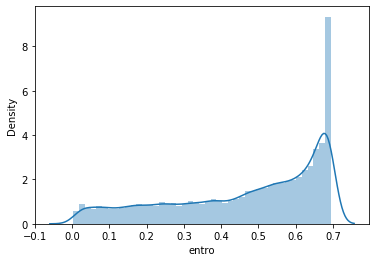

In [32]:
sns.distplot(df["entro"])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


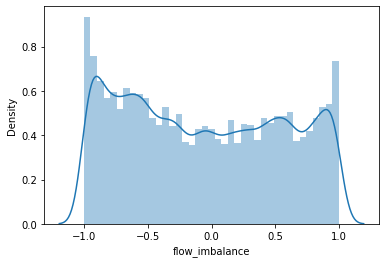

In [68]:
sns.distplot(df["flow_imbalance"])

In [71]:
df

,Unnamed: 0,zdate,id,stk_time,deal_or_not,accumulated_qty,deal_price,deal_qty,bid_1,bid_qty1,...,flow_imbalance,weighted_qty,mid_1,mid_pct,theo,theo_pct,action,position,return,return2
2,360,2021/3/26,2330,44281.37501,0,2060,0,0,581,170,...,116,155.264968,581.5,0.0,581.241071,-0.000002,0,0,0.0,1.0
3,361,2021/3/26,2330,44281.37501,0,2060,0,0,581,170,...,116,155.264968,581.5,0.0,581.241071,0.000000,0,0,0.0,1.0
4,362,2021/3/26,2330,44281.37501,0,2060,0,0,581,195,...,141,172.593648,581.5,0.0,581.216867,-0.000042,0,0,0.0,1.0
5,363,2021/3/26,2330,44281.37501,0,2060,0,0,581,214,...,160,185.763444,581.5,0.0,581.201493,-0.000026,0,0,0.0,1.0
6,364,2021/3/26,2330,44281.37501,0,2060,0,0,581,214,...,160,185.763444,581.5,0.0,581.201493,0.000000,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57030,57388,2021/3/26,2330,44281.56230,1,32723,590,3942,590,381,...,58,487.975615,590.5,0.0,590.458807,-0.000032,0,0,0.0,1.0
57031,57389,2021/3/26,2330,44281.56236,1,32723,590,3950,590,322,...,-1,447.079931,590.5,0.0,590.500775,0.000071,0,0,0.0,1.0
57032,57390,2021/3/26,2330,44281.56241,1,32723,590,3949,590,367,...,42,479.657849,590.5,0.0,590.469653,-0.000053,0,0,0.0,1.0
57033,57391,2021/3/26,2330,44281.56247,1,32723,590,3949,590,383,...,59,490.055057,590.5,0.0,590.458274,-0.000019,0,0,0.0,1.0


In [113]:
under_crit = 0.0
upper_crit = 0.5

In [123]:
df["action2"] = df["flow_imbalance"]*0
for i in trange(0, len(df["flow_imbalance"])):
    if  df["flow_imbalance"].iloc[i] >0.5  and df["action2"].iloc[0:i].sum() < 1:
        df["action2"].iloc[i] = 1
    elif df["flow_imbalance"].iloc[i]<-0.5  and df["action2"].iloc[0:i].sum() > -1:
        df["action2"].iloc[i] = -1


100%|██████████████████████████████████████████████████████████████████████████| 81391/81391 [00:15<00:00, 5280.39it/s]


In [126]:
len(df[df["action2"]!=0])


1821

In [190]:
df["flow_imbalance"]

3       -0.159915
4       -0.157447
5       -0.157447
6       -0.157447
7       -0.155650
           ...   
81604    0.583924
81605   -0.244537
81606    0.811974
81607    0.857834
81608    0.859427
Name: flow_imbalance, Length: 81391, dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


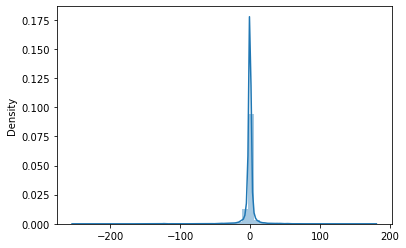

In [180]:
sns.distplot((df["flow_imbalance"])*(1/df["entro"]))

In [182]:
np.mean((df["flow_imbalance"])*(1/df["entro"]))
df["test"] = (df["flow_imbalance"])*(1/df["entro"])

In [163]:
df["action"] = df["entro"]*0
for i in trange(0, len(df["entro"])):
    if df["entro"].iloc[i]<0.1 and df["flow_imbalance"].iloc[i]>0.5 and df["action"].iloc[0:i].sum() < 1:
        df["action"].iloc[i] = 1
    elif df["entro"].iloc[i]<0.1 and df["flow_imbalance"].iloc[i]<-0.5  and df["action"].iloc[0:i].sum() > -1:
        df["action"].iloc[i] = -1


100%|█████████████████████████████████████████████████████████████████████████| 81391/81391 [00:03<00:00, 24849.24it/s]


In [203]:
df["action"] = df["test"]*0
for i in trange(0, len(df["entro"])):
    if df["test"].iloc[i]>8 and df["action"].iloc[0:i].sum() < 1:
        df["action"].iloc[i] = 1
    elif df["test"].iloc[i]<-8  and df["action"].iloc[0:i].sum() > -1:
        df["action"].iloc[i] = -1



100%|█████████████████████████████████████████████████████████████████████████| 81391/81391 [00:03<00:00, 21001.04it/s]


In [204]:
np.abs(df["action"]).sum()

929.0

In [205]:
df["position"] = df["action"].cumsum()
df["position2"] = df["action2"].cumsum()

In [206]:
df["return"] = df["position"]*df["mid_pct"]
df["return3"] = df["position2"]*df["mid_pct"]

In [207]:
df["return2"] = (df["return"]+1).cumprod()
df["return4"] = (df["return3"]+1).cumprod()


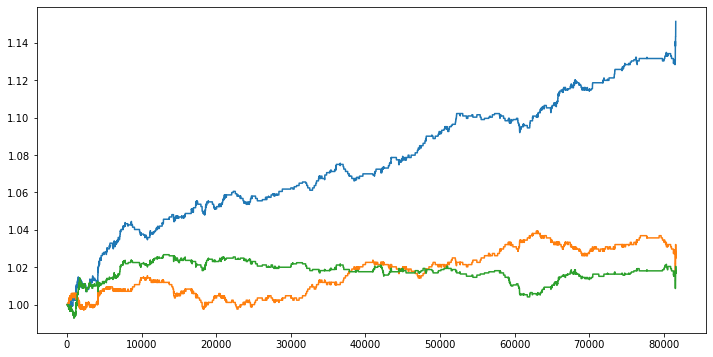

In [208]:
plt.figure(figsize = (12,6))
plt.plot(df["return2"])
plt.plot((df["mid_pct"]+1).cumprod())
plt.plot(df["return4"])

In [216]:
import tick
import Hawkes as hk

C:\Users\user\Anaconda3\lib\site-packages\Cython\Distutils\old_build_ext.py:41: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "


In [243]:
from tick.plot import plot_hawkes_kernels
from tick.hawkes import SimuHawkesExpKernels, SimuHawkesMulti, HawkesExpKern
import matplotlib.pyplot as plt

end_time = 10000
n_realizations = 10

decays = 3.
baseline = [0.12, ]
adjacency = [[.3, 0.]]

hawkes_exp_kernels = SimuHawkesExpKernels(
    adjacency=adjacency, decays=decays, baseline=baseline,
    end_time=end_time, verbose=False, seed=1039)

multi = SimuHawkesMulti(hawkes_exp_kernels, n_simulations=n_realizations)

multi.end_time = [(i + 1) / 10 * end_time for i in range(n_realizations)]
multi.simulate()

learner = HawkesExpKern(decays, penalty='l1', C=10, gofit='likelihood', 
                        verbose=True, tol=1e-11, solver='svrg', step=1e-3)
learner.fit(multi.timestamps, start=0.1)

plot_hawkes_kernels(learner, hawkes=hawkes_exp_kernels)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-243-207387f843db>", line 19, in <module>
    em.fit(kernel1)
  File "C:\Users\user\Anaconda3\lib\site-packages\tick\hawkes\inference\hawkes_em.py", line 142, in fit
    LearnerHawkesNoParam.fit(self, events, end_times=end_times)
  File "C:\Users\user\Anaconda3\lib\site-packages\tick\hawkes\inference\base\learner_hawkes_noparam.py", line 96, in fit
    self._set_data(events)
  File "C:\Users\user\Anaconda3\lib\site-packages\tick\hawkes\inference\base\learner_hawkes_noparam.py", line 114, in _set_data
    events, end_times = self._clean_events_and_endtimes(events)
  File "C:\Users\user\Anaconda3\lib\site-packages\tick\hawkes\inference\base\learner_hawkes_noparam.py", line 122, in _clean_events_and_endtimes
    if len(events[0]) == 0 or not isinstance(events[0][0], np.ndar

TypeError: 'HawkesKernelTimeFunc' object is not subscriptable